In [27]:
# import datasets

import pandas as pd

cols = ['X', 'Y']
df_elliptical = pd.read_csv('./Datasets/elliptical.txt', sep=" ", names=cols, header=None)

<AxesSubplot: xlabel='X', ylabel='Y'>

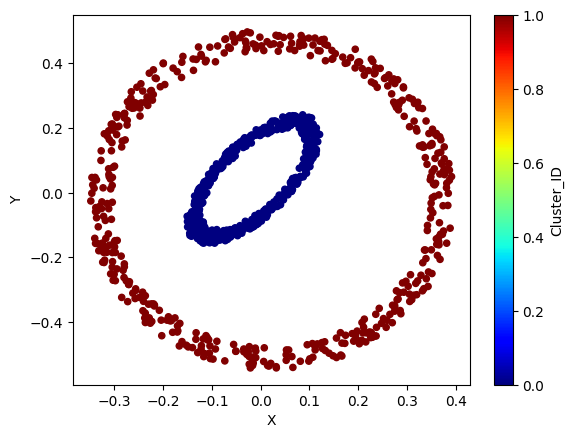

In [28]:
# implement spectral clustering

from sklearn import cluster

spectral = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=500)
spectral.fit(df_elliptical)
df_elliptical['Cluster_ID'] = spectral.labels_

# plot the clusters

df_elliptical.plot.scatter(x='X',y='Y',c='Cluster_ID',colormap='jet')